# **План проекта**        
        
[Описание проекта](#Описание-проекта)   

[1 Загрузка и изучение данных](#Загрузка-и-изучение-данных)   

[2 Подготовка данных](#Подготовка-данных)
- [2.1 Названия столбцов](#Названия-столбцов)
- [2.2 Пропущенные значения](#Пропущенные-значения)
- [2.3 Неявные дубликаты](#Неявные-дубликаты)
- [2.4 Формат данных](#Формат-данных)
- [2.5 Добавление данных](#Добавление-данных)   

[3 Исследовательский анализ](#Исследовательский-анализ)   
- [3.1 Год выпуска](#Год-выпуска)
- [3.2 Платформа](#Платформа)
- [3.3 Актуальный период](#Актуальный-период)
- [3.4 Потенциально прибыльные платформы](#Потенциально-прибыльные-платформы)
- [3.5 Ящик с усами](#Ящик-с-усами)
- [3.6 Диаграмма рассеяния и корреляция](#Диаграмма-рассеяния-и-корреляция)
- [3.5 Зависимость от жанра](#Зависимость-от-жанра)   


[4 Портрет пользователя](#Портрет-пользователя)   
- [4.1 Топ-5 платформ](#Топ-5-платформ)
- [4.1 Топ-5 жанров](#Топ-5-жанров)
- [4.3 Рейтинг ESRB](#Рейтинг-ESRB)   


[5 Проверка гипотез](#Проверка-гипотез)   
- [5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#Средние-пользовательские-рейтинги-платформ-Xbox-One-и-PC-одинаковые)
- [5.2 Средние пользовательские рейтинги жанров Action и Sports  разные](#Средние-пользовательские-рейтинги-жанров-Action-и-Sports-разные)   

[6 Выводы](#Выводы) 

# Описание проекта

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
Данные до 2016 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных:**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Задача:**   
- *Отработать принцип работы с данными*
- *Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.*



**Примечание:**   
        Данные за 2016 год могут быть неполными.*

### Загрузка и изучение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

In [ ]:
games = pd.read_csv('/datasets/games.csv')

SyntaxError: invalid syntax (4139690574.py, line 2)

In [3]:
def dataframe_info(df, head=True, describe=True, info=True, missing_values=True, duplicates=True):
    if head:
        print("Первые строки:")
        # print(df.head())
        display(df.head())
        print("\n")
    
    if describe:
        print("Описательная статистика:")
        # print(df.describe())
        display(df.describe())
        print("\n")
    
    if info:
        print("Информация о DataFrame:")
        # print(df.info())
        display(df.info())
        print("\n")
        
    
    if missing_values:
        missing_values_count = df.isna().sum()
        if missing_values_count.sum() > 0:
            print("Пропущенные значения:")
            # print(missing_values_count)
            display(missing_values_count)
            print("\n")
        else:
            print("Пропущенные значения не найдены.")
            
    if duplicates:
        duplicates_count = df.duplicated().sum()
        if duplicates_count > 0:
            print("Количество дубликатов:", duplicates_count)
            print("Дубликаты:")
            # print(df[df.duplicated()])
            df[df.duplicated()]
            print("\n")
        else:
            print("Дубликатов не найдено.")

dataframe_info(games, head=True, describe=True, info=True, duplicates=True, missing_values=True)

Первые строки:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN




Описательная статистика:


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000




Информация о DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None



Пропущенные значения:


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64



Дубликатов не найдено.


In [ ]:
display(games.head(2))
games.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB




На этапе изучения данных установлено:   
- Данные за период с 1980 по 2016 год
- датафрейм содержит 16715 строк и 11 столбцов
- есть пропуски в 6 столбцах   
- нет явных дубликатов.   
- названия столбцов указаны разным стилем.   
- формат столбца с годом релиза необходимо изменить на целочисленный, с оценкой пользователей - на число с плавающей точкой, с оценкой критиков на целочисленное


### Подготовка данных

#### Названия столбцов

Приведем названия столбцов к единому стилю

In [5]:
games = games.rename(columns=str.lower)
games.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


#### Пропущенные значения

В столбцах с незначительным количеством пропущенных значений:
- название - 2 пропуска (0.012%),
- год релиза - 269 пропусков (1.61%),
- жанр - 2 пропуска (0.012%) 
удалим пропуски.

In [6]:
games= games.dropna(subset=['name', 'year_of_release', 'genre'])
print("Количество пропущенных значений после удаления:", games.isna().sum(), sep='\n')
print("Общее количество строк в DataFrame:", games.shape[0], sep='\n')

Количество пропущенных значений после удаления:
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64
Общее количество строк в DataFrame:
16444


In [7]:
missing_values_count = games[games['critic_score'].isna() & games['user_score'].isna() & games['rating'].isna()].shape[0]
missing_values_count

6534

Построим график распределения пропусков по годам и график распределения выпусков игр по годам

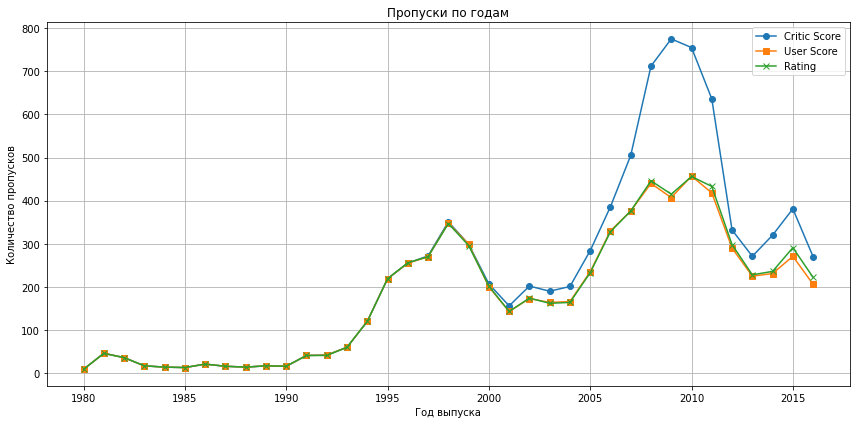

In [8]:
missing_values_by_year = games.isna().groupby(games['year_of_release']).sum()

plt.figure(figsize=(12, 6))
plt.plot(missing_values_by_year.index, missing_values_by_year['critic_score'], label='Critic Score', marker='o')
plt.plot(missing_values_by_year.index, missing_values_by_year['user_score'], label='User Score', marker='s')
plt.plot(missing_values_by_year.index, missing_values_by_year['rating'], label='Rating', marker='x')
plt.title('Пропуски по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество пропусков')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

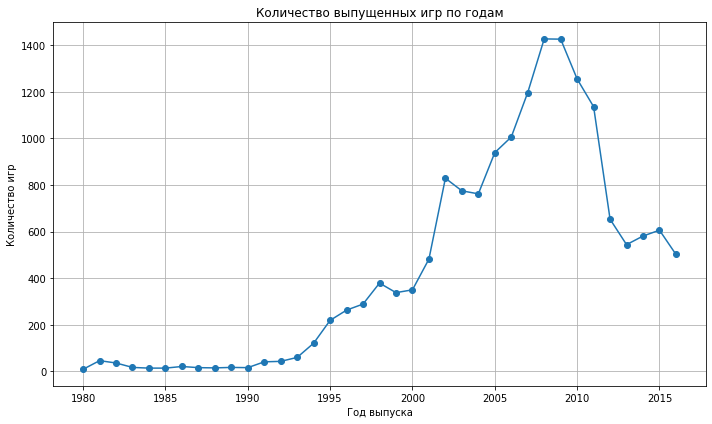

In [9]:
games_per_year = games['year_of_release'].value_counts().sort_index()

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(games_per_year.index, games_per_year.values, marker='o')
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.grid(True)
plt.tight_layout()
plt.show()

Столбцы с оценкой критиков, пользователей и рейтингом содержат много пропусков - удалить их и заменить средними значениями мы не можем, так как это значительно исказит результаты исследования датафрейма - оставляем без изменений.
Отметим, что большая часть пропусков (6580) в этих трех столбах отсутствует одновременно.
Графики пропусков и выпуска игр очень похожи, возможно увеличение количества пропусков связано с увеличеснием количества игр. У рейтингового агенства, критиков и пользователей не было возможности (может и желания) обозревать все выпускаемые игры, а упор делался на самое популярное. 


#### Неявные дубликаты

Выполним проверку на неявные дубликаты 

In [10]:
duplicates = games[games.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]
if not duplicates.empty:
    print("Дубликаты по трем столбцам':")
    #print(duplicates)
    display(duplicates)
else:
    print("Дубликатов не найдено.")

Дубликаты по трем столбцам':


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Выяили один дубликат - удалим его и проверим результат.

In [11]:
games = games.drop_duplicates(subset=['name', 'platform', 'year_of_release'])
duplicates = games[games.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]
if not duplicates.empty:
    print("Дубликаты по трем столбцам':")
    #print(duplicates)
    duplicates
else:
    print("Дубликатов не найдено.")

Дубликатов не найдено.


#### Формат данных

Изучим столбец с оценкой пользователей

In [12]:
games['user_score'].value_counts(dropna=False)

NaN    6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
0.5       2
1         2
1.9       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

Значение 'tbd' в 2376 строках - аббревиатура вероятнее всего означает To Be Determined (будет определено) или To Be Decided (будет решено) или To Be Done (будет сделано) - значит рейтинг еще не присвоен. Удалять такое количество данных нецелесообразно, поэтому:
- изменим это значение на 'не определено'
- проверим результат

In [13]:
games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['user_score'].value_counts(dropna=False)

NaN    8981
7.8     322
8       285
8.2     276
8.3     252
       ... 
1         2
0.5       2
2.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Изменим форматы столбцов в колонке с годом выпуска и оценкой пользователей:
- год - целочисленные значения
- оценка пользователей - числа с плавающей точкой

In [14]:
games[['year_of_release', 'user_score']] = \
    games[['year_of_release', 'user_score']].astype({
        'year_of_release': int, 
        'user_score': float
    })
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### Добавление данных

Посчитаем суммарные продажи и добавим отдельный столбец с этими значениями

In [15]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games.info()
games.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000,7982.000000,7462.000000,16443.000000
mean,2006.485921,0.264028,0.145939,0.078492,0.047597,68.992608,7.126548,0.536055
std,5.875546,0.818400,0.506731,0.311109,0.188011,13.920049,1.499429,1.558828
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


На этапе подготовки данных:

- привели названия столбцов к lower_case стилю
- выявили пропущенные значения. В столбцах name, year_of_release и genre удалили пропуски. В столбцах critic_scorе, user_score и rating оставили без изменений, так как пропусков много и их удаление может исказить исследование.
- выполнили проверку на неявные дубликаты - выявили один и удалили его
- изменили формат данных в стобцах year_of_release (на целочисленный) и user_score (на число с плавающей точкой)
- посчитали суммарные продажи и добавили столбец total_sales


Столбцы с оценкой критиков, пользователей и рейтингом содержат много пропусков - удалить их и заменить средними значениями мы не можем, так как это значительно исказит результаты исследования датафрейма - оставляем без изменений.
Отметим, что большая часть пропусков (6580) в этих трех столбах отсутствует одновременно.
Графики пропусков и выпуска игр очень похожи, возможно увеличение количества пропусков связано с увеличеснием количества игр. У рейтингового агенства, критиков и пользователей не было возможности (может и желания) обозревать все выпускаемые игры, а упор делался на самое популярное. 

In [ ]:
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

### Исследовательский анализ

#### Год выпуска

Визуализируем информацию о том, сколько игр выпускалось в разные годы

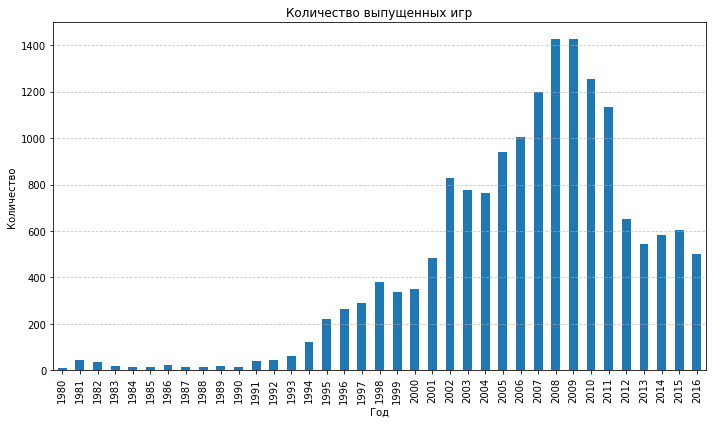

In [17]:
plt.figure(figsize=(10, 6))
games['year_of_release'].value_counts().sort_index().plot(kind='bar')
plt.title('Количество выпущенных игр')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Больше всего игр за год выпускалось в промежутке с 2002 по 2010 год. Максимальное количество игр за год было выпущено в 2008 и 2009 годах (1427 и 1426 соответственно) и меньше всего в 1980 году (всего 9).   
В начале 90х начался рост в индустрии игр и на этом этапе маленькая команда могла создать популярный и дорогой (приносящий много прибыли) продукт. В начале 2000х этот рынок уже был поделен между 20-30 крупными издателями, которые в свою очередь финансировали маленькие студии, постепенно поглощая их. Рост всей сферы продолжался до кризиса 2008 года,  в 2012м произошел резкий спад объемов выпуска.   
Кризис 2008 года не сразу отразился на издателях игр - в 2009 м году было опубликовано огромное колиество проектов, которые разрабатывались в прошлые годы и в которые уже было вложено много средств. Крупным издателям "по инерции" приносили крупные доходы уже выпущенные успешные проекты, и они могли направлять достаточные (но уже гораздо меньшие чем до кризиса) средства на "доразработку". Падение прибыли имело сильный отложенный эффект. Например, знаменитая Electronic Arts провалилась в 2008 на 75% и оставалась там целых 5 лет.


#### Платформа

Визуализируем информацию о продажах в разбивке по платформам

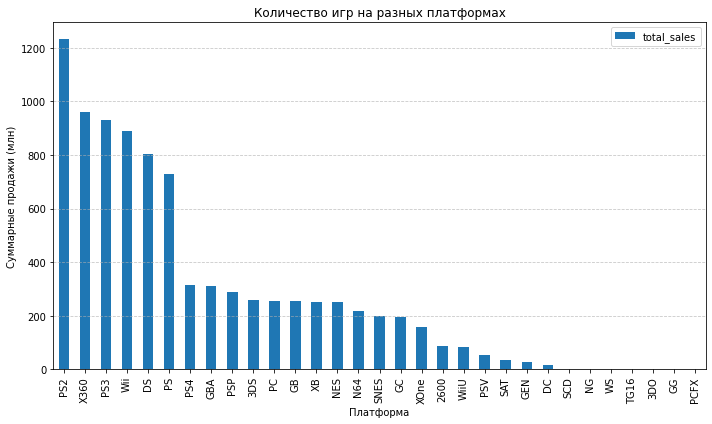

In [18]:
platforms = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
platforms.plot(kind='bar', figsize=(10, 6))
plt.title('Количество игр на разных платформах')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи (млн)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Рассмотрим распределение сумарных продаж топ выделяющихся платформ

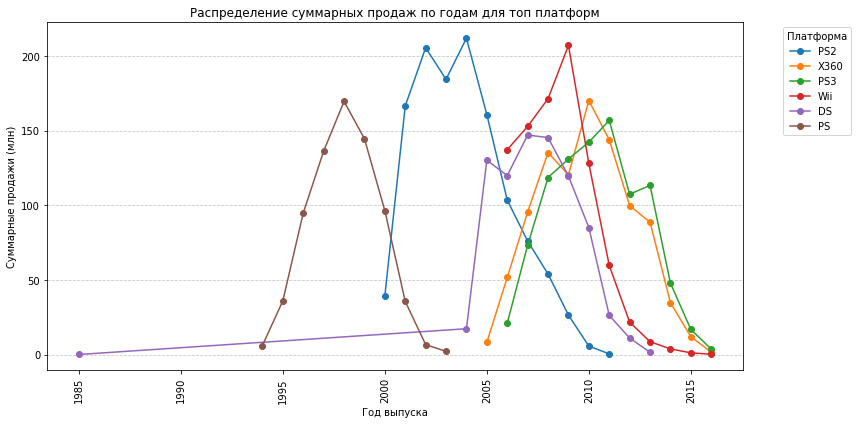

In [19]:
platforms_top = platforms.loc[platforms['total_sales'] > 400].index
games_top = games[games['platform'].isin(platforms_top)]

plt.figure(figsize=(12, 6))
for platform in platforms_top:
    platform_data = games_top[games_top['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    plt.plot(platform_data.index, platform_data.values, label=platform, marker='o')

plt.title('Распределение суммарных продаж по годам для топ платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн)')
plt.xticks(rotation=90)
plt.legend(title='Платформа', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Выявили топ 6 платформ с наибольшими суммарными продажами. На графике распределения хорошо прослеживается характерный период "жизни" платформ - около 10-11 лет, рост происходит за 4-5 лет. 

In [ ]:
temp = games.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

In [21]:
temp_games = games.copy() 
platforms_2016 = temp_games[temp_games['year_of_release'] == 2016]['platform'].unique()
temp_games = temp_games[~temp_games['platform'].isin(platforms_2016)]
time_life = temp_games.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1
median_life = round(time_life['life'].median())
median_life

8

In [22]:
temp_games = games.copy()
max_sales_year_per_platform = temp_games.groupby('platform')['total_sales'].idxmax()
max_sales_years = temp_games.loc[max_sales_year_per_platform, ['platform', 'year_of_release']]
min_sales_year_per_platform = temp_games.groupby('platform')['year_of_release'].min()
min_sales_years = min_sales_year_per_platform.reset_index()

platform_years = pd.merge(max_sales_years, min_sales_years, on='platform', suffixes=('_max_sales', '_min_sales'))

platform_years['sales_span'] = platform_years['year_of_release_max_sales'] - platform_years['year_of_release_min_sales']
platform_years['sales_span'].median()


2.0

#### Актуальный период

Учитывая полученные ранее, данные определим актуальный период для дальнейшего исследования.   
Характерный период жизненного цикла платформы около 8 лет, активная фаза роста 2 года.    
Так как платформы, которые уже находятся на спаде, могли хорошо продаваться в прошлые годы, целесообразно взять в дальнейшую работу отрезок времени приблизительной равный 2 этапам роста. Возьмем отрезок с 2013 по 2016 включительно.

Необходимо убрать из анализа те платформы, которые уже "ушли" (нет данных за 2016 год) или, находящиеся на завершающих годах жизненного цикла к 2017 году (по таким есть данные до 2010 года). 

Выведем агрегированную таблицу

In [23]:
games_actual = games.query('year_of_release >= 2009 & year_of_release <= 2016')
games_pivot = games_actual.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
games_pivot

year_of_release,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,
3DS,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DS,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
PC,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25
PS2,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN
PS3,130.93,142.17,156.78,107.35,113.25,47.76,16.82,3.60
PS4,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25
PSP,37.78,35.04,17.82,7.69,3.14,0.24,0.12,NaN
PSV,NaN,NaN,4.63,16.19,10.59,11.90,6.25,4.25
Wii,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18


Оставим только интересующие нас платформы

In [24]:
games_pivot = games_pivot.loc[games_pivot[2010].isna()==True].copy()
games_pivot.dropna(subset = [2016], inplace = True)
games_pivot

year_of_release,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,
3DS,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
PS4,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25
PSV,NaN,NaN,4.63,16.19,10.59,11.90,6.25,4.25
WiiU,NaN,NaN,NaN,17.56,21.65,22.03,16.35,4.60
XOne,NaN,NaN,NaN,NaN,18.96,54.07,60.14,26.15


In [25]:
games_actual = games.query('year_of_release >= 2013 & year_of_release <= 2016')
games_pivot = games_actual.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
games_pivot

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,56.57,43.76,27.78,15.14
DS,1.54,NaN,NaN,NaN
PC,12.38,13.28,8.52,5.25
PS3,113.25,47.76,16.82,3.60
PS4,25.99,100.00,118.90,69.25
PSP,3.14,0.24,0.12,NaN
PSV,10.59,11.90,6.25,4.25
Wii,8.59,3.75,1.14,0.18
WiiU,21.65,22.03,16.35,4.60


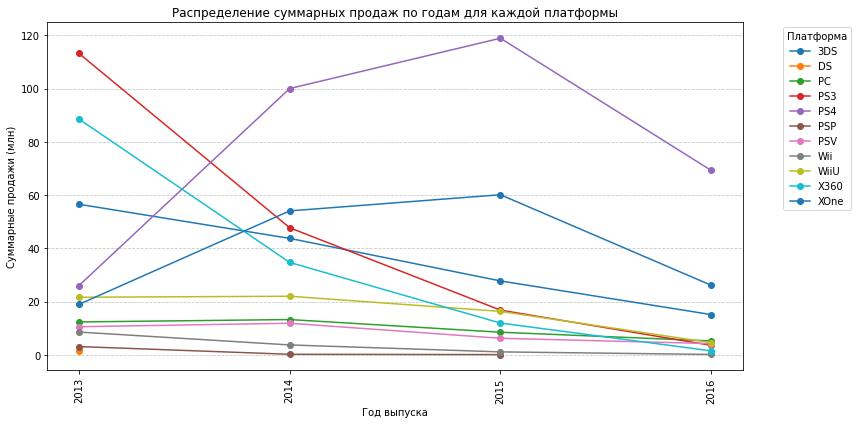

In [26]:
plt.figure(figsize=(12, 6))
for platform in games_pivot.index:
    platform_data = games_pivot.loc[platform]
    plt.plot(platform_data.index, platform_data.values, label=platform, marker='o')

plt.title('Распределение суммарных продаж по годам для каждой платформы')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн)')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.legend(title='Платформа', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

В оставшейся выборке DC и PSP уже вышли из игры. PC, PS3, Wii, X360 - либо уже уйдут к 2017, либо будут на терминальных стадиях.

#### Потенциально прибыльные платформы

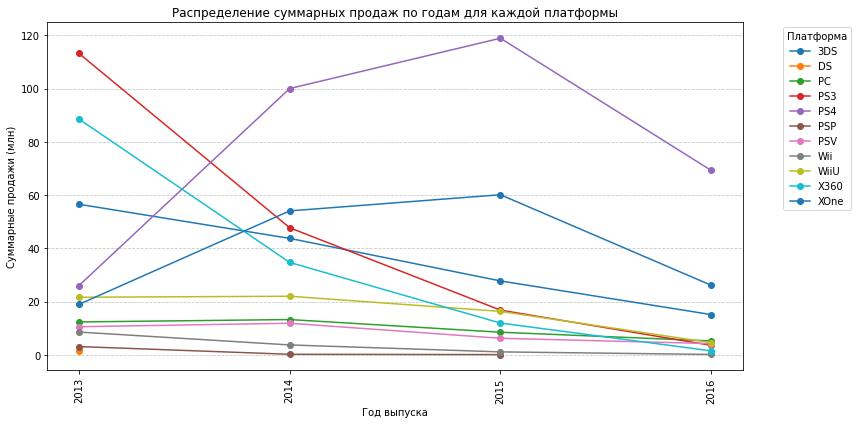

In [27]:
plt.figure(figsize=(12, 6))
for platform in games_pivot.index:
    platform_data = games_pivot.loc[platform]
    plt.plot(platform_data.index, platform_data.values, label=platform, marker='o')

plt.title('Распределение суммарных продаж по годам для каждой платформы')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн)')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.legend(title='Платформа', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Согласно полученныму ранее периоду роста платформ (график это также подтверждает), все оставшиеся платформы уже его завершили, таким образом среди существующих платформ нет потенциальных "растущих". 

#### Ящик с усами

Построим диаграммы размаха по глобальным продажам игр в разбивке по платформам

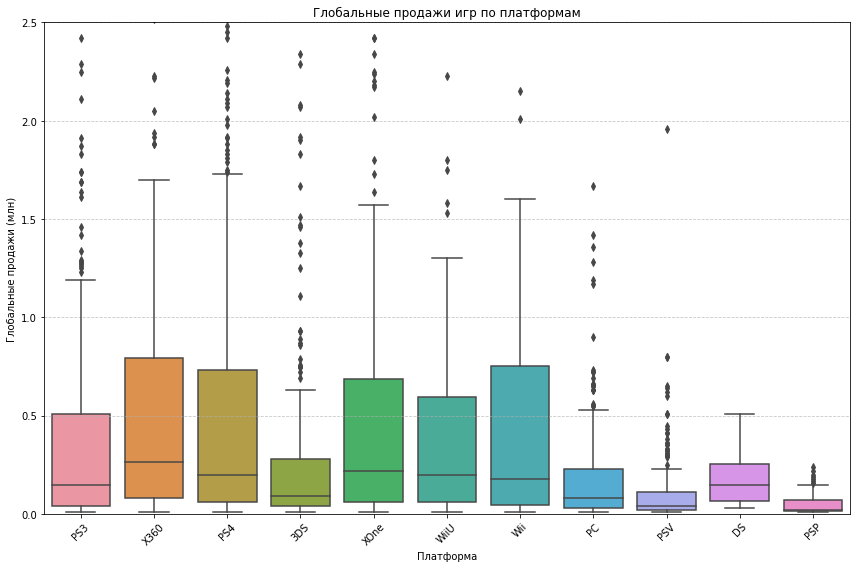

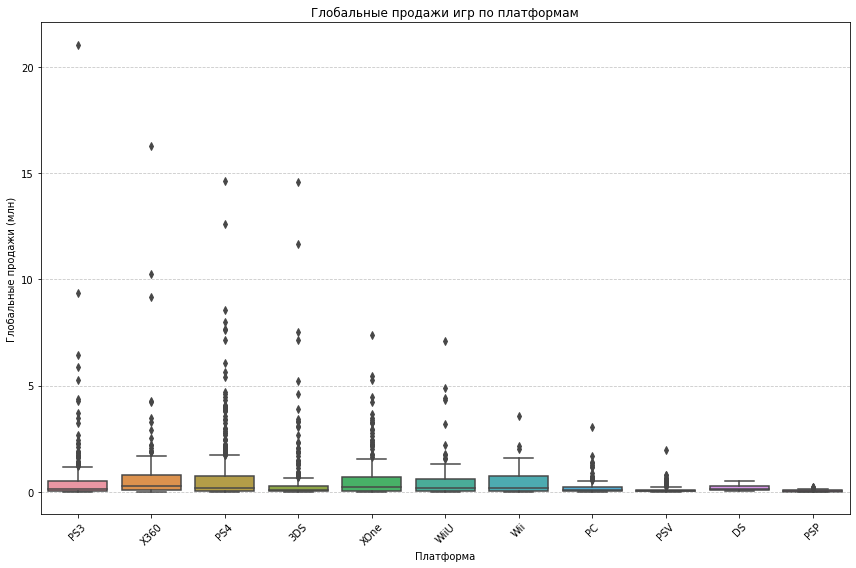

In [28]:
plt.figure(figsize=(12, 8))
sb.boxplot(x='platform', y='total_sales', data=games_actual)
plt.title('Глобальные продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн)')
plt.ylim(top=2.5 , bottom=0)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sb.boxplot(x='platform', y='total_sales', data=games_actual)
plt.title('Глобальные продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Прибыль сконцентрирована в диапазоне от 0 до ~500 тыс копий. Для лидеров диапазон немного выше Wii, X360, PS3, PS4, XOne и WiiU. Медиана для всех платформ находится в диапазоне от ~0.05 до ~0.35. Заметен сильный скос вправо - особенно сильно заметно у PS4 и XOne. 

#### Диаграмма рассеяния и корреляция

Построим диаграмму рассеяния и посчитаем корреляцию оценок критиков и пользователей и результатов продаж внутри платформ PS4 и XOne

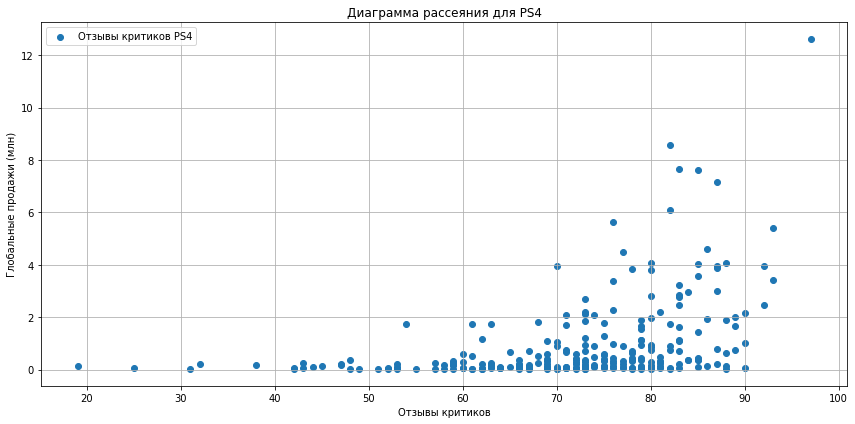

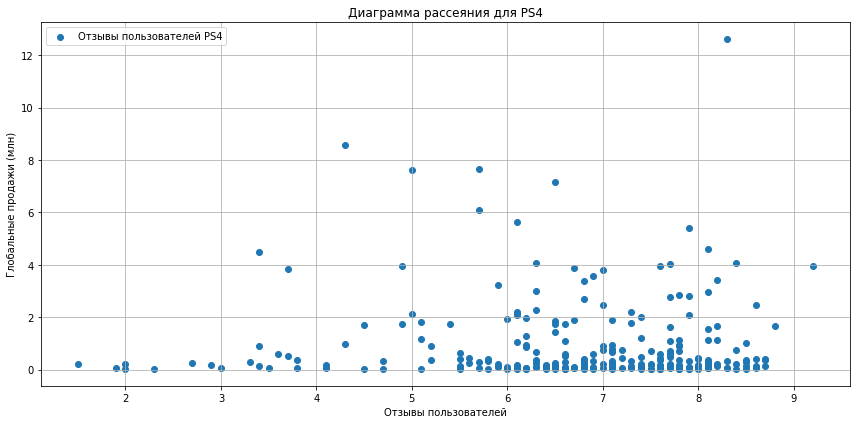

Корреляция между отзывами критиков и продажами для PS4: 0.40656790206178095
Корреляция между отзывами пользователей и продажами для PS4: -0.031957110204556376


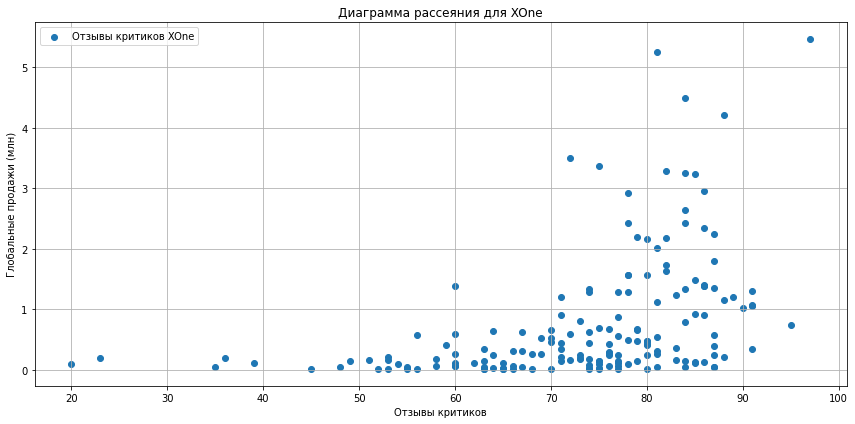

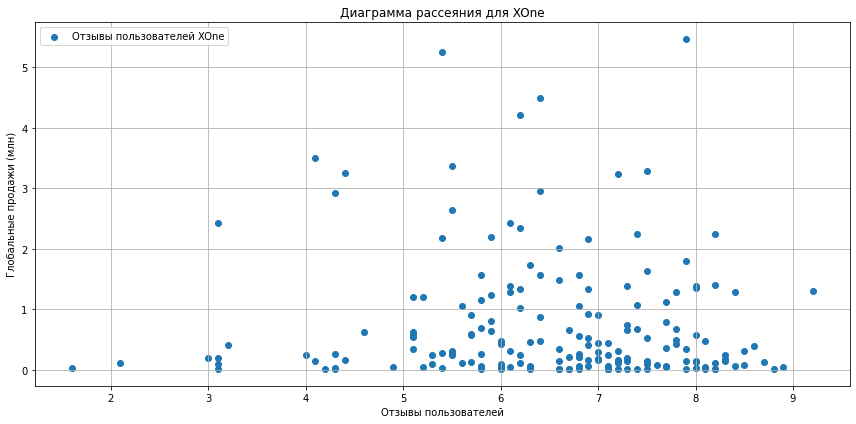

Корреляция между отзывами критиков и продажами для XOne: 0.4169983280084017
Корреляция между отзывами пользователей и продажами для XOne: -0.06892505328279414


In [29]:
platform_ps4_data = games_actual[games_actual['platform'] == 'PS4']
plt.figure(figsize=(12, 6))
plt.scatter(platform_ps4_data['critic_score'], platform_ps4_data['total_sales'], label='Отзывы критиков PS4')
plt.title('Диаграмма рассеяния для PS4')
plt.xlabel('Отзывы критиков')
plt.ylabel('Глобальные продажи (млн)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(platform_ps4_data['user_score'], platform_ps4_data['total_sales'], label='Отзывы пользователей PS4')
plt.title('Диаграмма рассеяния для PS4')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Глобальные продажи (млн)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

correlation_critic_ps4 = platform_ps4_data['critic_score'].corr(platform_ps4_data['total_sales'])
correlation_user_ps4 = platform_ps4_data['user_score'].corr(platform_ps4_data['total_sales'])

print(f"Корреляция между отзывами критиков и продажами для PS4: {correlation_critic_ps4}")
print(f"Корреляция между отзывами пользователей и продажами для PS4: {correlation_user_ps4}")


platform_xone_data = games_actual[games_actual['platform'] == 'XOne']
plt.figure(figsize=(12, 6))
plt.scatter(platform_xone_data['critic_score'], platform_xone_data['total_sales'], label='Отзывы критиков XOne')
plt.title('Диаграмма рассеяния для XOne')
plt.xlabel('Отзывы критиков')
plt.ylabel('Глобальные продажи (млн)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(platform_xone_data['user_score'], platform_xone_data['total_sales'], label='Отзывы пользователей XOne')
plt.title('Диаграмма рассеяния для XOne')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Глобальные продажи (млн)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

correlation_critic_xone = platform_xone_data['critic_score'].corr(platform_xone_data['total_sales'])
correlation_user_xone = platform_xone_data['user_score'].corr(platform_xone_data['total_sales'])

print(f"Корреляция между отзывами критиков и продажами для XOne: {correlation_critic_xone}")
print(f"Корреляция между отзывами пользователей и продажами для XOne: {correlation_user_xone}")




Построим диаграмму рассеяния и посчитаем корреляцию оценок критиков и пользователей и результатов продаж внутри платформ PS3 и X360

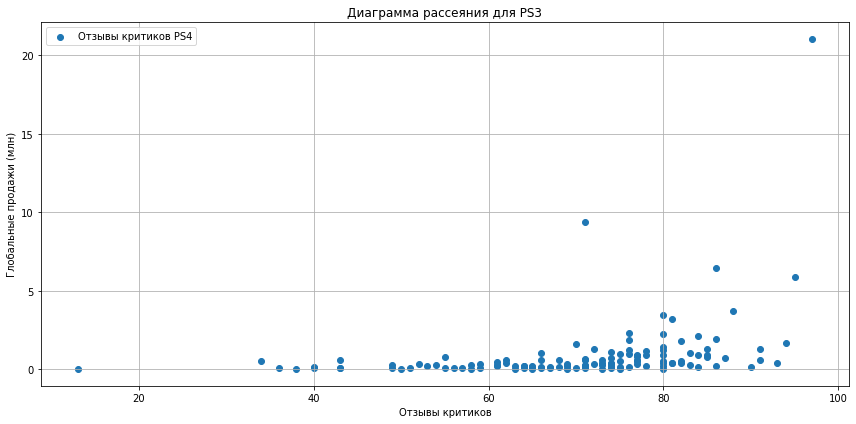

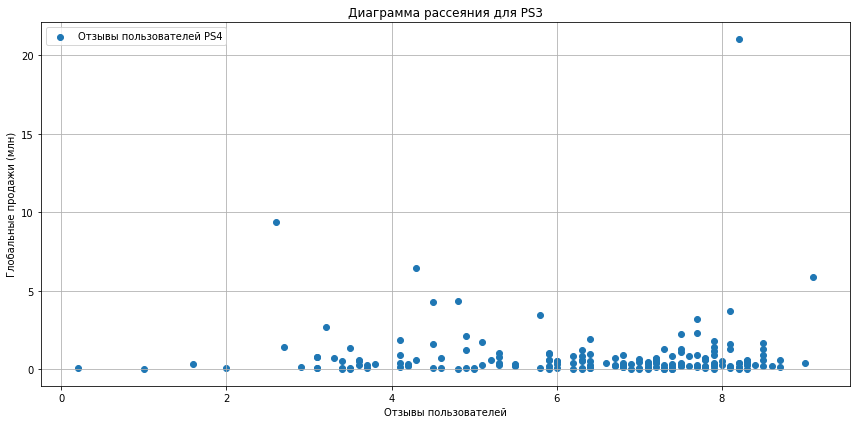

Корреляция между отзывами критиков и продажами для PS3: 0.3342853393371919
Корреляция между отзывами пользователей и продажами для PS3: 0.0023944027357566925


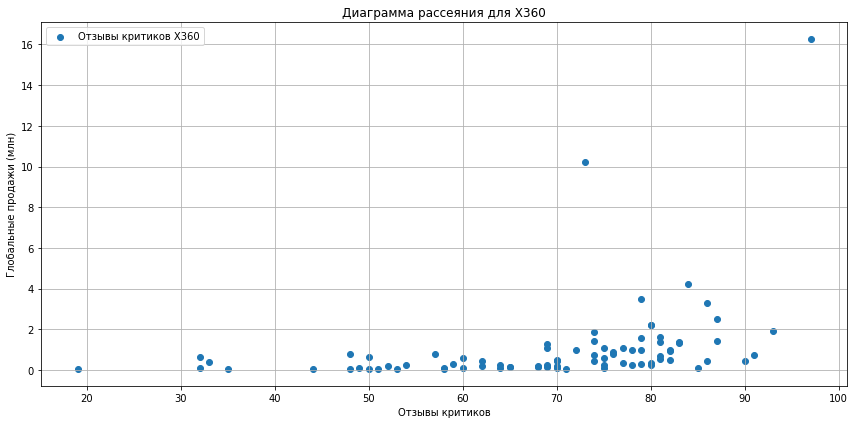

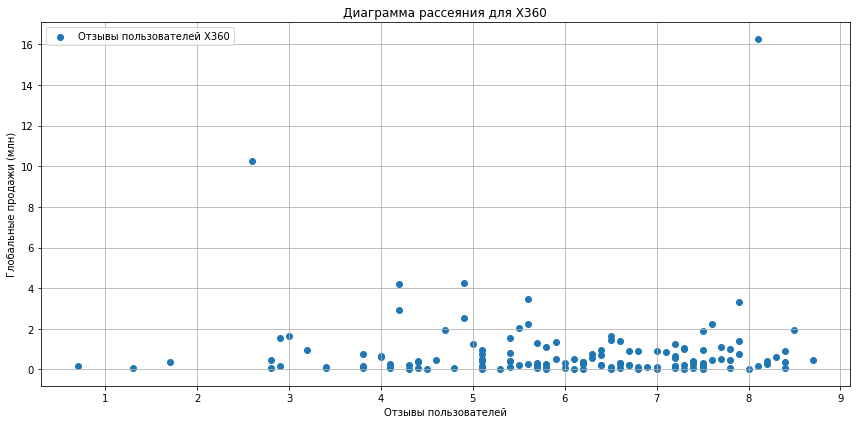

Корреляция между отзывами критиков и продажами для X360: 0.3503445460228664
Корреляция между отзывами пользователей и продажами для X360: -0.011742185147181342


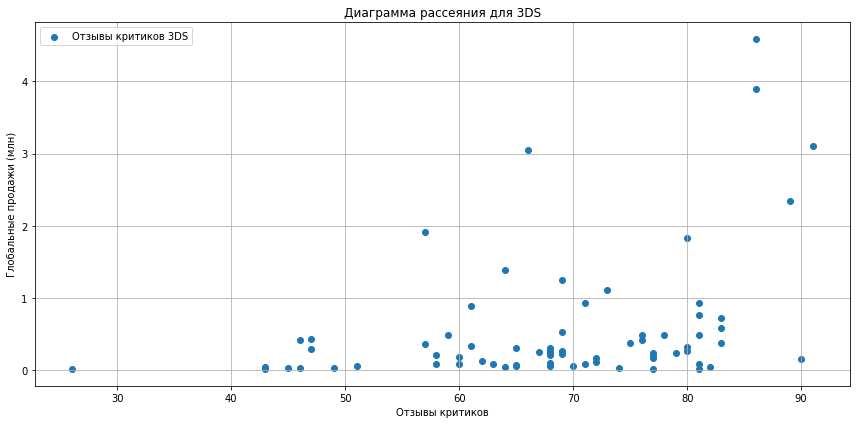

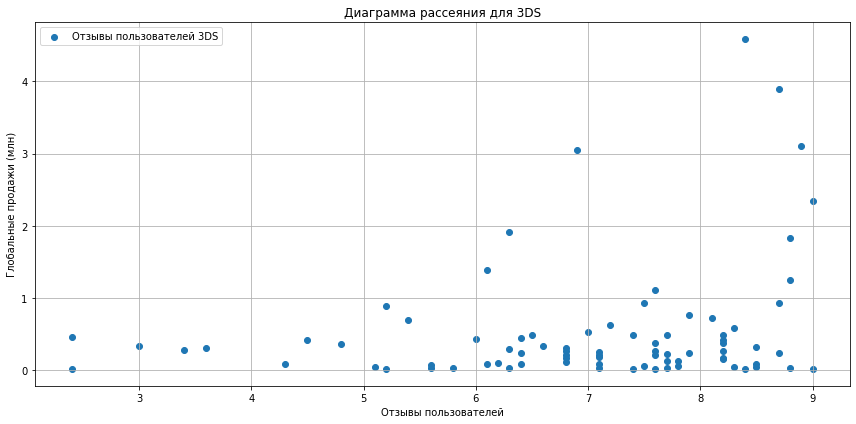

Корреляция между отзывами критиков и продажами для 3DS: 0.3570566142288103
Корреляция между отзывами пользователей и продажами для 3DS: 0.24150411773563016


In [30]:
platform_ps3_data = games_actual[games_actual['platform'] == 'PS3']
plt.figure(figsize=(12, 6))
plt.scatter(platform_ps3_data['critic_score'], platform_ps3_data['total_sales'], label='Отзывы критиков PS4')
plt.title('Диаграмма рассеяния для PS3')
plt.xlabel('Отзывы критиков')
plt.ylabel('Глобальные продажи (млн)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(platform_ps3_data['user_score'], platform_ps3_data['total_sales'], label='Отзывы пользователей PS4')
plt.title('Диаграмма рассеяния для PS3')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Глобальные продажи (млн)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

correlation_critic_ps3 = platform_ps3_data['critic_score'].corr(platform_ps3_data['total_sales'])
correlation_user_ps3 = platform_ps3_data['user_score'].corr(platform_ps3_data['total_sales'])

print(f"Корреляция между отзывами критиков и продажами для PS3: {correlation_critic_ps3}")
print(f"Корреляция между отзывами пользователей и продажами для PS3: {correlation_user_ps3}")


platform_x360_data = games_actual[games_actual['platform'] == 'X360']
plt.figure(figsize=(12, 6))
plt.scatter(platform_x360_data['critic_score'], platform_x360_data['total_sales'], label='Отзывы критиков X360')
plt.title('Диаграмма рассеяния для Х360')
plt.xlabel('Отзывы критиков')
plt.ylabel('Глобальные продажи (млн)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(platform_x360_data['user_score'], platform_x360_data['total_sales'], label='Отзывы пользователей X360')
plt.title('Диаграмма рассеяния для X360')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Глобальные продажи (млн)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

correlation_critic_x360 = platform_x360_data['critic_score'].corr(platform_x360_data['total_sales'])
correlation_user_x360 = platform_x360_data['user_score'].corr(platform_x360_data['total_sales'])

print(f"Корреляция между отзывами критиков и продажами для X360: {correlation_critic_x360}")
print(f"Корреляция между отзывами пользователей и продажами для X360: {correlation_user_x360}")


platform_3ds_data = games_actual[games_actual['platform'] == '3DS']
plt.figure(figsize=(12, 6))
plt.scatter(platform_3ds_data['critic_score'], platform_3ds_data['total_sales'], label='Отзывы критиков 3DS')
plt.title('Диаграмма рассеяния для 3DS')
plt.xlabel('Отзывы критиков')
plt.ylabel('Глобальные продажи (млн)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(platform_3ds_data['user_score'], platform_3ds_data['total_sales'], label='Отзывы пользователей 3DS')
plt.title('Диаграмма рассеяния для 3DS')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Глобальные продажи (млн)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

correlation_critic_3ds = platform_3ds_data['critic_score'].corr(platform_3ds_data['total_sales'])
correlation_user_3ds = platform_3ds_data['user_score'].corr(platform_3ds_data['total_sales'])

print(f"Корреляция между отзывами критиков и продажами для 3DS: {correlation_critic_3ds}")
print(f"Корреляция между отзывами пользователей и продажами для 3DS: {correlation_user_3ds}")



Построим диаграмму рассеяния и посчитаем корреляцию между оценками критиков и пользователей и совокупными продажами

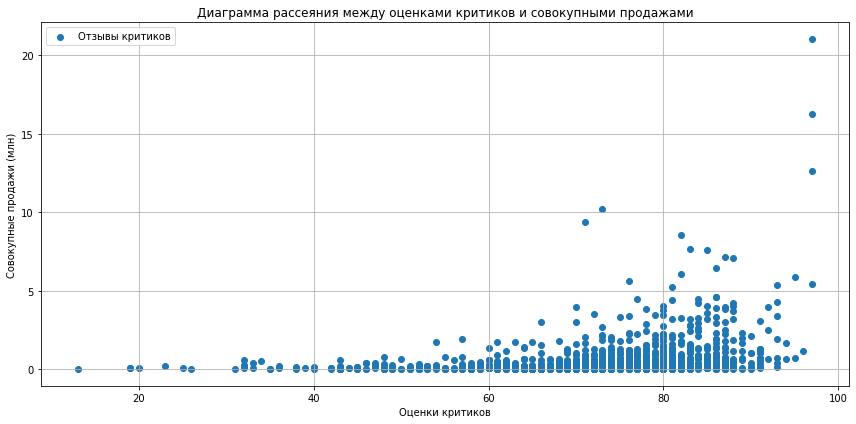

Корреляция между оценками критиков и совокупными продажами: 0.3136995151027371


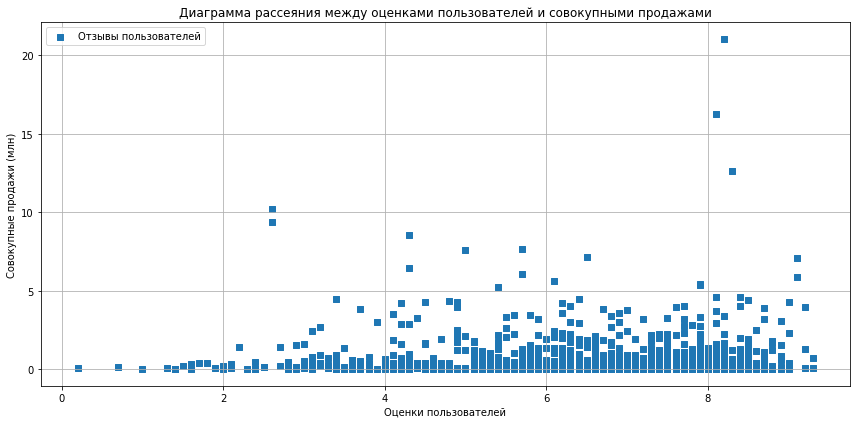

Корреляция между оценками пользователей и совокупными продажами: -0.0026078133545982744


In [31]:
plt.figure(figsize=(12, 6))
plt.scatter(games_actual['critic_score'], games_actual['total_sales'], label='Отзывы критиков', marker='o')
plt.title('Диаграмма рассеяния между оценками критиков и совокупными продажами')
plt.xlabel('Оценки критиков')
plt.ylabel('Совокупные продажи (млн)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

correlation_critic_sales = games_actual['critic_score'].corr(games_actual['total_sales'])
print(f"Корреляция между оценками критиков и совокупными продажами: {correlation_critic_sales}")

plt.figure(figsize=(12, 6))
plt.scatter(games_actual['user_score'], games_actual['total_sales'], label='Отзывы пользователей', marker='s')
plt.title('Диаграмма рассеяния между оценками пользователей и совокупными продажами')
plt.xlabel('Оценки пользователей')
plt.ylabel('Совокупные продажи (млн)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

correlation_user_sales = games_actual['user_score'].corr(games_actual['total_sales'])
print(f"Корреляция между оценками пользователей и совокупными продажами: {correlation_user_sales}")



Проведем анализ полученных результатов:
- Корреляция между оценками критиков и совокупными продажами: 0.29, есть прямая зависимость (небольшая) между оценками критиков и результатами продаж. 
- Корреляция между оценками пользователей и совокупными продажами 0.07, зависимость практически отсутствует.

Если рассматривать отдельно взятые топовые платформы то взаимосвясь оценок критиков и продаж сильнее, чем при рассмотрении в совокупности. Пять рассмотренных платформ показывают корреляци между отзывами критиков и продажами от 0.33 до 0.42.
Корреляция между отзывами критиков и продажами для PS4: 0.41
Корреляция между отзывами критиков и продажами для XOne: 0.42
Корреляция между отзывами критиков и продажами для PS3: 0.33
Корреляция между отзывами критиков и продажами для X360: 0.35
Корреляция между отзывами критиков и продажами для 3DS: 0.36


А зависимость между оценками пользователей и продажами близка к нулю (Кроме платформы 3ДС, где прямая зависимость прослеживается, хоть и незначительная).
Корреляция между отзывами пользователей и продажами для PS4: 0.03
Корреляция между отзывами пользователей и продажами для XOne: -0.07
Корреляция между отзывами пользователей и продажами для PS3: 0.002
Корреляция между отзывами пользователей и продажами для X360: -0.01
Корреляция между отзывами пользователей и продажами для 3DS: 0.24


#### Зависимость от жанра

Визуализируем данные о распределении продаж в зависимости от жанра и создадим агрегированную таблицу с данными по жанрам.

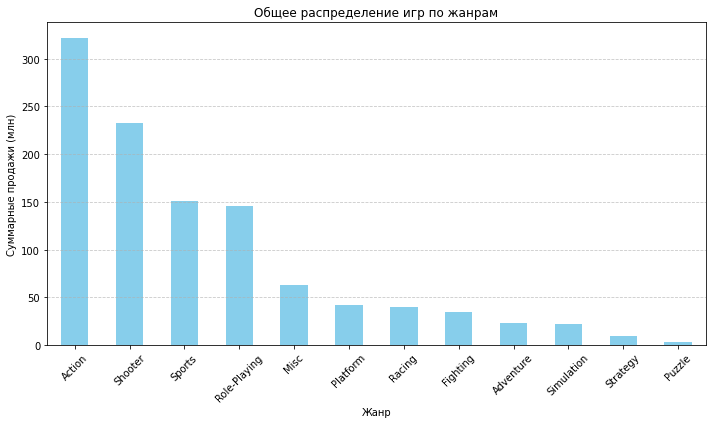

In [32]:
genre_sales = games_actual.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar', color='skyblue')
plt.title('Общее распределение игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи (млн)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [33]:
genre_games = games_actual.pivot_table(index='genre', values='total_sales', aggfunc=('sum', 'median', 'count', 'mean'))
round(genre_games.sort_values(by='sum', ascending=False), 2)

,count,mean,median,sum
genre,,,,
Action,766,0.42,0.11,321.87
Shooter,187,1.25,0.45,232.98
Sports,214,0.70,0.24,150.65
Role-Playing,292,0.50,0.12,145.89
Misc,155,0.41,0.10,62.82
Platform,74,0.58,0.22,42.63
Racing,85,0.47,0.12,39.89
Fighting,80,0.44,0.12,35.31
Adventure,245,0.10,0.03,23.64


Самые продаваемые направления это action (бесспорный лидер), sports, shooters, самые непродаваемые adventure, puzzle, strategy (лидер с конца). Медиана и среднее значение сильно отличаются для всех платформ, вероятнее всего это связано с тем, что у всех компаний есть особо успешные проекты (выбросы) и именно они и продаются чаще.
По среднему и медианному значению shooter лидирует, а adventure занимает низшую позицию.

На этапе исследовательского анализа:

- Визуализировали информацию о том, сколько игр выпускалось в разные годы, с разбивкой по платформам и за актуальный период.   
Больше всего игр за год выпускалось в промежутке с 2002 по 2010 год. Максимальное количество игр за год было выпущено в 2008 и 2009 годах (1427 и 1426 соответственно) и меньше всего в 1980 году (всего 9).   
В начале 90х начался рост в индустрии игр и на этом этапе маленькая команда могла создать популярный и дорогой (приносящий много прибыли) продукт. В начале 2000х этот рынок уже был поделен между 20-30 крупными издателями, которые в свою очередь финансировали маленькие студии, постепенно поглощая их. Рост всей сферы продолжался до кризиса 2008 года,  в 2012м произошел резкий спад объемов выпуска.   
Кризис 2008 года не сразу отразился на издателях игр - в 2009 м году было опубликовано огромное колиество проектов, которые разрабатывались в прошлые годы и в которые уже было вложено много средств. Крупным издателям "по инерции" приносили крупные доходы уже выпущенные успешные проекты, и они могли направлять достаточные (но уже гораздо меньшие чем до кризиса) средства на "доразработку". Падение прибыли имело сильный отложенный эффект. Например, знаменитая Electronic Arts провалилась в 2008 на 75% и оставалась там целых 5 лет.    


- В ходе исследования выявлены топ 6 платформ с наибольшими суммарными продажами. 


- Построили графики распределения по годам -  характерный период "жизни" платформ - около 8 лет, рост происходит за 2 года. 
Платформы GBA, GC, DC, XB, PS2 и DS давно вышли из игры. Платформы PC, PS3, PSP, Wii, X360 - либо уже уйдут к 2017, либо будут на терминальных стадиях. 


- Очистили данные от неактуальных платформ и установили, что, согласно полученныму ранее периоду роста платформ (график это также подтверждает), все оставшиеся платформы уже его (рост) завершили, таким образом среди существующих платформ нет потенциальных "растущих". 


- Построили диаграммы размаха по глобальным продажам игр в разбивке по платформам. Продажи сконцентрирована в диапазоне от 0 до ~500 тыс копий. Для лидеров диапазон немного выше Wii, X360, PS3, PS4, XOne и WiiU. Медиана для всех платформ находится в диапазоне от ~50 до ~350 тыс копий. Заметен сильный скос вправо - особенно сильно заметно у PS4 и XOne.    


- Построили диаграммы рассеяния и посчитали корреляцию оценок критиков и пользователей и результатов продаж.
Если рассматривать отдельно взятые топовые платформы то взаимосвясь оценок критиков и продаж сильнее, чем при рассмотрении в совокупности. Пять рассмотренных платформ показывают корреляци между отзывами критиков и продажами от 0.33 до 0.42.
Корреляция между отзывами критиков и продажами для PS4: 0.41
Корреляция между отзывами критиков и продажами для XOne: 0.42
Корреляция между отзывами критиков и продажами для PS3: 0.33
Корреляция между отзывами критиков и продажами для X360: 0.35
Корреляция между отзывами критиков и продажами для 3DS: 0.36


А зависимость между оценками пользователей и продажами близка к нулю (Кроме платформы 3ДС, где прямая зависимость прослеживается, хоть и незначительная).
Корреляция между отзывами пользователей и продажами для PS4: 0.03
Корреляция между отзывами пользователей и продажами для XOne: -0.07
Корреляция между отзывами пользователей и продажами для PS3: 0.002
Корреляция между отзывами пользователей и продажами для X360: -0.01
Корреляция между отзывами пользователей и продажами для 3DS: 0.24


- Визуализировали данные о распределении прибыльности в зависимости от жанра и создали агрегированную таблицу с данными по жанрам.   
Самые прибыльные направления это action (бесспорный лидер), sports, shooters, самые малодохожные adventure, puzzle, strategy (лидер с конца). Медиана и среднее значение сильно отличаются для всех платформ, вероятнее всего это связано с тем, что у всех компаний есть особо успешные проекты (выбросы) и именно они приносят большую часть прибыли.
По среднему и медианному значению shooter лидирует, а adventure занимает низшую позицию.

### Портрет пользователя

#### Топ-5 платформ

Определим топ-5 популярных платформ в каждом регионе, создадим таблицу и построем график распределения долей

In [34]:
region_sales = games_actual.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
top_platforms_na = region_sales['na_sales'].nlargest(5)
top_platforms_eu = region_sales['eu_sales'].nlargest(5)
top_platforms_jp = region_sales['jp_sales'].nlargest(5)
top_platforms_other = region_sales['other_sales'].nlargest(5)


table_na = pd.DataFrame(top_platforms_na).T
table_eu = pd.DataFrame(top_platforms_eu).T
table_jp = pd.DataFrame(top_platforms_jp).T
table_other = pd.DataFrame(top_platforms_other).T

combined_tables = pd.concat([table_na, table_eu, table_jp, table_other])

combined_tables


platform,PS4,XOne,X360,PS3,3DS,PSV,WiiU
na_sales,108.74,93.12,81.66,63.50,38.20,NaN,NaN
eu_sales,141.09,51.59,42.52,67.81,30.96,NaN,NaN
jp_sales,15.96,NaN,NaN,23.35,67.81,18.59,10.88
other_sales,48.35,14.27,12.11,26.77,6.28,NaN,NaN


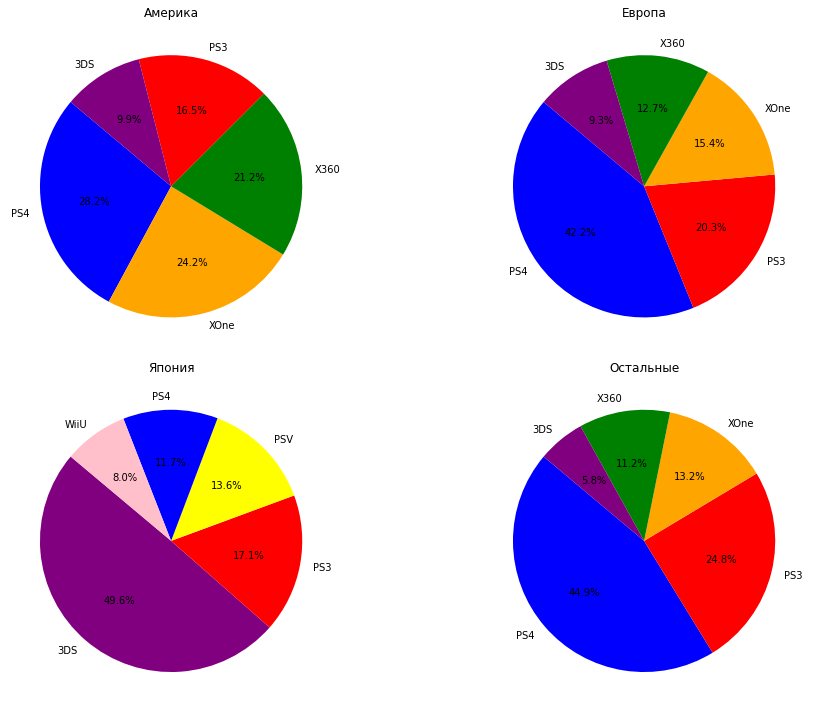

In [35]:
platform_colors = {}

colors = ['blue', 'orange', 'green', 'red', 'purple', 'yellow', 'pink', 'grey']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax, (region, data) in zip(axes.flatten(), region_sales.items()):
    top_platforms = data.nlargest(5)
    pie_colors = [] 
    for platform in top_platforms.index:
        if platform in platform_colors:
            pie_colors.append(platform_colors[platform])
        else:
            platform_colors[platform] = colors[len(platform_colors) % len(colors)]
            pie_colors.append(platform_colors[platform])
    ax.pie(top_platforms, labels=top_platforms.index, autopct='%1.1f%%', startangle=140, colors=pie_colors)
    ax.set_title(f'Топ-5 платформ в регионе {region}')

axes[0, 0].set_title('Америка')
axes[0, 1].set_title('Европа')
axes[1, 0].set_title('Япония')
axes[1, 1].set_title('Остальные')

plt.tight_layout()
plt.show()

Можем выделить PS4, PS3 и 3DS (синий, красный и фиолетовый на графиках долей) - они вошли в топ во всех регионах. Америка и Европа и Остальные имеют очень похожий профиль пользователя (относительно платформы) все платформы в топе одинаковые. У японских пользователей 3 платформы совпадают с Америкой и Европой и Остальными. 
Северная Америка: PS4, XOne, X360, PS3, 3DS	 
Европа:  PS4, XOne, X360, PS3, 3DS    
Япония:  PS4, PS3, 3DS, PSV, WiiU
Остальной мир: PS4, XOne, X360, PS3, 3DS 
Для наглядности для каждой платформы используется один цвет на всех "пирогах", где платформа вошла в топ. 

#### Топ-5 жанров

Определим топ-5 популярных жанров в каждом регионе, создадим таблицу и построем график распределения долей

In [36]:
region_genre_sales = games_actual.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
top_genres_na = region_genre_sales['na_sales'].nlargest(5)
top_genres_eu = region_genre_sales['eu_sales'].nlargest(5)
top_genres_jp = region_genre_sales['jp_sales'].nlargest(5)
top_genres_other = region_genre_sales['other_sales'].nlargest(5)


table_genres_na = pd.DataFrame(top_genres_na).T
table_genres_eu = pd.DataFrame(top_genres_eu).T
table_genres_jp = pd.DataFrame(top_genres_jp).T
table_genres_other = pd.DataFrame(top_genres_other).T

combined_tables = pd.concat([table_genres_na, table_genres_eu, table_genres_jp, table_genres_other])

combined_tables

genre,Action,Shooter,Sports,Role-Playing,Misc,Racing,Fighting
na_sales,126.05,109.74,65.27,46.40,27.49,NaN,NaN
eu_sales,118.13,87.86,60.52,36.97,NaN,20.19,NaN
jp_sales,40.49,6.61,NaN,51.04,9.20,NaN,7.65
other_sales,37.20,28.77,19.45,11.48,6.09,NaN,NaN


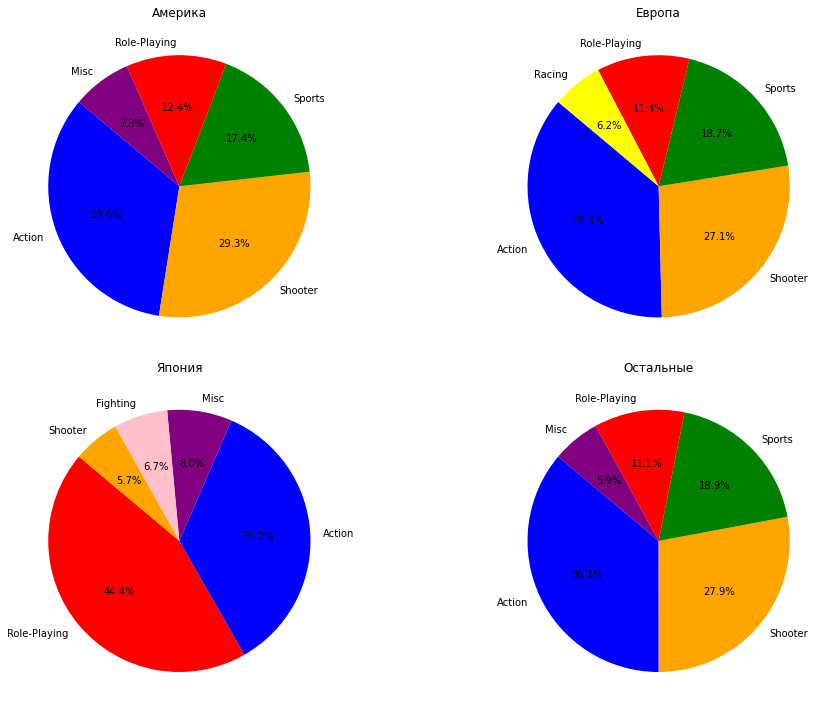

In [37]:
genre_colors = {}

colors = ['blue', 'orange', 'green', 'red', 'purple', 'yellow', 'pink', 'grey']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax, (region, data) in zip(axes.flatten(), region_genre_sales.items()):
    top_genres = data.nlargest(5)
    pie_colors = [] 
    for genre in top_genres.index:
        if genre in genre_colors:
            pie_colors.append(genre_colors[genre])
        else:
            genre_colors[genre] = colors[len(genre_colors) % len(colors)]
            pie_colors.append(genre_colors[genre])
    ax.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=140, colors=pie_colors)
    ax.set_title(f'Топ-5 жанров в регионе {region}')

axes[0, 0].set_title('Америка')
axes[0, 1].set_title('Европа')
axes[1, 0].set_title('Япония')
axes[1, 1].set_title('Остальные')

plt.tight_layout()
plt.show()

Видим сходство с распределением топ платформ - Американские и Евпропейские пользователи имеют 4 одинаковых жанра в топе (Action, Sports, Shooter, Role-Playing) японцы с американцами тоже 4  (Action, Shooter, Role-Playing, Misc), остальной мир повторяет за Америкой. Предпочтения по жанрам у Японских пользователей отличаются. В Японии самые топовые жанры Role-Playing и Action, менее популярные Misc, Simulation, Fighting.

#### Рейтинг ESRB

Оценим взаимосвязь рейтинга и продаж в отдельном регионе

Ассоциация ESRB определяет возрастной рейтинг компьютерных игр. Имеется 8 вариантов рейтинга:

- AO ("Adults Only 18+") — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет;   
- E ("Everyone") — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше, такие игры могут понравиться и взрослым;   
- E10+ ("Everyone 10 and older") — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови;   
- EC ("Early childhood") — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими;   
- K-A ("Kids to Adult") — «От детей до взрослых»: Игры, содержание которых подходит любой аудитории;   
- M («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.   
- T («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше.   
- RP («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.   

In [38]:
region_rating_sales = games_actual.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

table_rating_na = pd.DataFrame(region_rating_sales['na_sales']).T
table_rating_eu = pd.DataFrame(region_rating_sales['eu_sales']).T
table_rating_jp = pd.DataFrame(region_rating_sales['jp_sales']).T
table_rating_other = pd.DataFrame(region_rating_sales['other_sales']).T

combined_tables = pd.concat([table_rating_na, table_rating_eu, table_rating_jp, table_rating_other])

combined_tables

rating,E,E10+,M,T
na_sales,79.05,54.24,165.21,49.79
eu_sales,83.36,42.69,145.32,41.95
jp_sales,15.14,5.89,14.11,20.59
other_sales,22.61,12.57,47.04,14.29


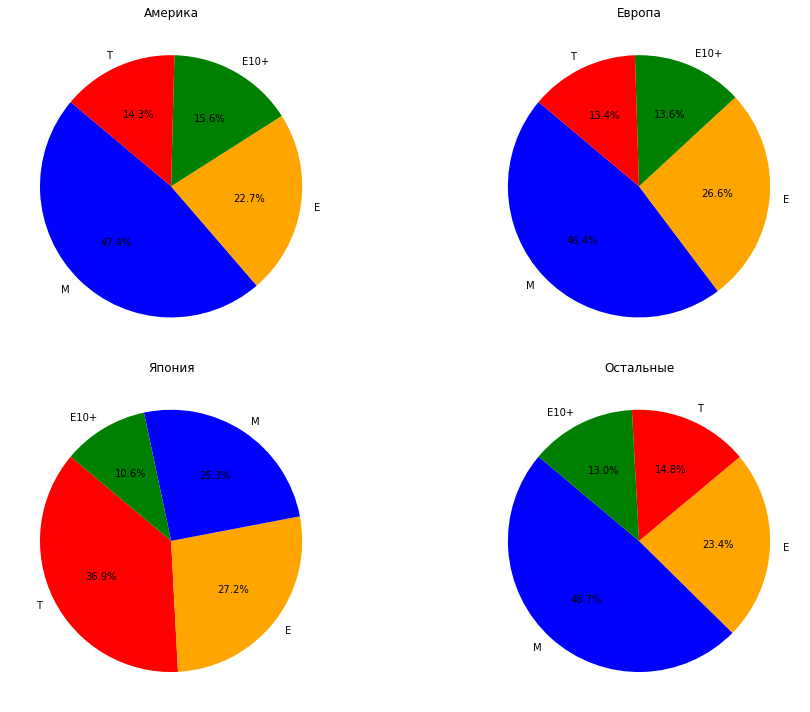

In [39]:
rating_colors = {}

colors = ['blue', 'orange', 'green', 'red', 'purple', 'yellow']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax, (region, data) in zip(axes.flatten(), region_rating_sales.items()):
    top_rating = data.nlargest(6)
    pie_colors = [] 
    for rating in top_rating.index:
        if rating in rating_colors:
            pie_colors.append(rating_colors[rating])
        else:
            rating_colors[rating] = colors[len(rating_colors) % len(colors)]
            pie_colors.append(rating_colors[rating])
    ax.pie(top_rating, labels=top_rating.index, autopct='%1.1f%%', startangle=140, colors=pie_colors)
    ax.set_title(f'Топ-5 жанров в регионе {region}')

axes[0, 0].set_title('Америка')
axes[0, 1].set_title('Европа')
axes[1, 0].set_title('Япония')
axes[1, 1].set_title('Остальные')

plt.tight_layout()
plt.show()

Снова очень похожий набор у Америки и Европы и остального мира
Самые продаваемые игры категории "для взрослых" (пользователей старше 17 лет), продажи таких игр приходится от ~46% до ~49%. Второе место в Америке, Европе и Остальном мире рейтинг Е «Для всех» - 23%, 27% и 23% соответственно. 
В Японии на первом месте рейтинг "для подростков" (для пользователей старше 13 лет), на втором игры категории Е (для всех) и  на третьем игры для взрослых.Игры для детей младшего возраста совсем не популярны в мире. А игры, которым еще не присвоен рейтинг, скорее всего не продаются, пока им не будет присвоен рейтинг. 

In [40]:
# Комментарий ревьюера
temp = games_actual.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts(dropna=False)

977 0.43752798925212716


NaN     977
M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

На этапе составления пользовательского портрета:

- Определили топ-5 популярных платформ в каждом регионе, создали таблицу и построили график распределения долей.   
Установили, что PS4, PS3 и 3DS (синий, красный и фиолетовый на графиках долей) - они вошли в топ во всех регионах. Америка и Европа и Остальные имеют очень похожий профиль пользователя (относительно платформы) все платформы в топе одинаковые. У японских пользователей 3 платформы совпадают с Америкой и Европой и Остальными. 
Северная Америка: PS4, XOne, X360, PS3, 3DS	 
Европа:  PS4, XOne, X360, PS3, 3DS    
Япония:  PS4, PS3, 3DS, PSV, WiiU
Остальной мир: PS4, XOne, X360, PS3, 3DS 

- Определили топ-5 популярных жанров в каждом регионе, создали таблицу и построили график распределения долей.   
Видим сходство с распределением топ платформ - Американские и Евпропейские пользователи имеют 4 одинаковых жанра в топе (Action, Sports, Shooter, Role-Playing) японцы с американцами тоже 4  (Action, Shooter, Role-Playing, Misc), остальной мир повторяет за Америкой. Предпочтения по жанрам у Японских пользователей отличаются. В Японии самые топовые жанры Role-Playing и Action, менее популярные Misc, Simulation, Fighting.

- Оценили взаимосвязь рейтинга и продаж в отдельном регионе   
Ассоциация ESRB определяет возрастной рейтинг компьютерных игр. Имеется 8 вариантов рейтинга:

 - AO ("Adults Only 18+") — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет;   
 - E ("Everyone") — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше, такие игры могут  понравиться и взрослым;   
 - E10+ ("Everyone 10 and older") — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови;   
 - EC ("Early childhood") — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими;   
 - K-A ("Kids to Adult") — «От детей до взрослых»: Игры, содержание которых подходит любой аудитории;   
 - M («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.   
 - T («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше.   
 - RP («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.   


Снова очень похожий набор у Америки и Европы и остального мира
Самые продаваемые игры категории "для взрослых" (пользователей старше 17 лет), продажи таких игр приходится от ~46% до ~49%. Второе место в Америке, Европе и Остальном мире рейтинг Е «Для всех» - 23%, 27% и 23% соответственно. 
В Японии на первом месте рейтинг "для подростков" (для пользователей старше 13 лет), на втором игры категории Е (для всех) и  на третьем игры для взрослых.Игры для детей младшего возраста совсем не популярны в мире. А игры, которым еще не присвоен рейтинг, скорее всего не продаются, пока им не будет присвоен рейтинг. 

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем гипотезу:

H_0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H_1: Средние пользовательские рейтинги платформ Xbox One и PC разные

alpha = 0.05


Посмотрим на распределение этих выборок


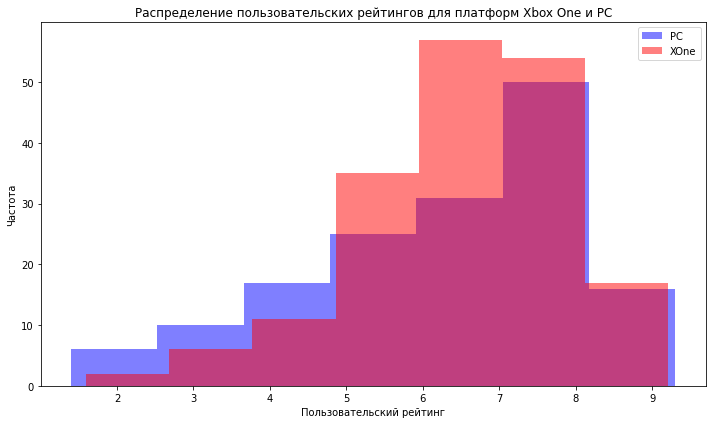

In [41]:
user_score_xbox = games_actual[games_actual['platform'] == 'XOne']['user_score'].dropna()
user_score_pc = games_actual[games_actual['platform'] == 'PC']['user_score'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(user_score_pc, bins=7, alpha=0.5, color='blue', label='PC')

plt.hist(user_score_xbox, bins=7, alpha=0.5, color='red', label='XOne')

plt.xlabel('Пользовательский рейтинг')
plt.ylabel('Частота')
plt.title('Распределение пользовательских рейтингов для платформ Xbox One и PC')
plt.legend()
plt.tight_layout()
plt.show()


Данные распределены нормально, хоть и есть смещение вправо.   Для проверки этой гипотезы мы можем использовать t-тест для независимых выборок, так как у нас две разные платформы (Xbox One и PC) и мы сравниваем средние значения пользовательских рейтингов между ними.

In [42]:
results = stats.ttest_ind(user_score_xbox, user_score_pc, equal_var=False)

alpha = 0.05
print('p-value =', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC разные")
else:
    print("Не отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые")


p-value = 0.14759594013430463
Не отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые


По результату теста (p-value больше альфа) мы не отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

#### Средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем гипотезу:

H_0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

H_1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

alpha = 0.05


Посмотрим на распределение этих выборок

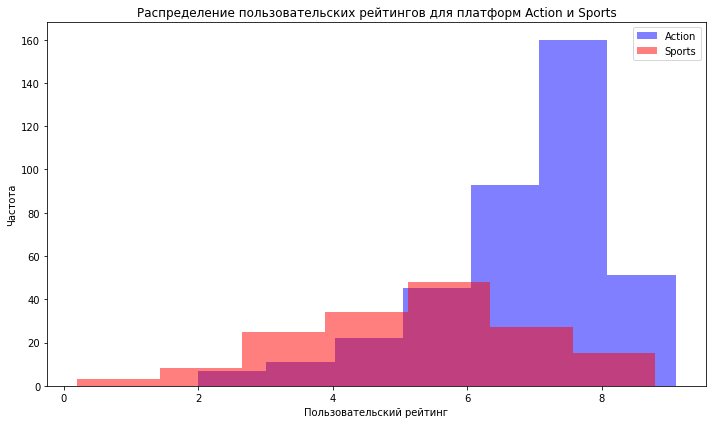

In [43]:
user_score_action = games_actual[games_actual['genre'] == 'Action']['user_score'].dropna()
user_score_sports = games_actual[games_actual['genre'] == 'Sports']['user_score'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(user_score_action, bins=7, alpha=0.5, color='blue', label='Action')

plt.hist(user_score_sports, bins=7, alpha=0.5, color='red', label='Sports')

plt.xlabel('Пользовательский рейтинг')
plt.ylabel('Частота')
plt.title('Распределение пользовательских рейтингов для платформ Action и Sports')
plt.legend()
plt.tight_layout()
plt.show()

Данные распределены нормально, хоть и есть смещение вправо.   Для проверки этой гипотезы мы можем использовать t-тест для независимых выборок, так как у нас два разных жанра, и мы сравниваем средние значения пользовательских рейтингов между ними.

In [44]:
results = stats.ttest_ind(user_score_action, user_score_sports, equal_var=False)

alpha = 0.05
print('p-value =', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports разные")
else:
    print("Не отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports одинаковые")

p-value = 1.4460039700704315e-20
Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports разные


По результату теста (p-value меньше альфа) мы отвергаем нулевую гипотезу и можем утверждать, что средние рейтинги пользователей разные.

### Выводы

Исследование данных проводилось в несколько этапов, каждый из которых описан ниже.


1. **На этапе изучения данных установлено:**   
- Данные за период с 1980 по 2016 год
- датафрейм содержит 16715 строк и 11 столбцов
- есть пропуски в 6 столбцах   
- нет явных дубликатов.   
- названия столбцов указаны разным стилем.   
- формат столбца с годом релиза необходимо изменить на целочисленный, с оценкой пользователей - на число с плавающей точкой, с оценкой критиков на целочисленное

2. **На этапе подготовки данных:**

- привели названия столбцов к lower_case стилю
- выявили пропущенные значения. В столбцах name, year_of_release и genre удалили пропуски. В столбцах critic_scorе, user_score и rating оставили без изменений, так как пропусков много и их удаление может исказить исследование.
- выполнили проверку на неявные дубликаты - выявили один и удалили его
- изменили формат данных в стобцах year_of_release (на целочисленный) и user_score (на число с плавающей точкой)
- посчитали суммарные продажи и добавили столбец total_sales   
- Значение 'tbd' в 2376 строках - аббревиатура вероятнее всего означает To Be Determined (будет определено) или To Be Decided (будет решено) или To Be Done (будет сделано) - значит рейтинг еще не присвоен. Удалять такое количество данных нецелесообразно, поэтому изменили это значение на 'не определено'
Столбцы с оценкой критиков, пользователей и рейтингом содержат много пропусков - удалить их и заменить средними значениями мы не можем, так как это значительно исказит результаты исследования датафрейма - оставляем без изменений.
Отметим, что большая часть пропусков (6580) в этих трех столбах отсутствует одновременно.
Графики пропусков и выпуска игр очень похожи, возможно увеличение количества пропусков связано с увеличением количества игр. У рейтингового агенства, критиков и пользователей не было возможности (может и желания) обозревать все выпускаемые игры, а упор делался на самое популярное. 
Пропуски в отзывах могли появиться, потому что продажи игры были низкие и не набралось необходимого количества индивидуальных отзывов для получения итоговой оценки. А так же, игра получила региональный возрастной рейтинг, а не северо-американский ESRB.

3. **На этапе исследовательского анализа:**

- Визуализировали информацию о том, сколько игр выпускалось в разные годы, с разбивкой по платформам и за актуальный период.   
Больше всего игр за год выпускалось в промежутке с 2002 по 2010 год. Максимальное количество игр за год было выпущено в 2008 и 2009 годах (1427 и 1426 соответственно) и меньше всего в 1980 году (всего 9).   
В начале 90х начался рост в индустрии игр и на этом этапе маленькая команда могла создать популярный и дорогой (приносящий много прибыли) продукт. В начале 2000х этот рынок уже был поделен между 20-30 крупными издателями, которые в свою очередь финансировали маленькие студии, постепенно поглощая их. Рост всей сферы продолжался до кризиса 2008 года,  в 2012м произошел резкий спад объемов выпуска.   
Кризис 2008 года не сразу отразился на издателях игр - в 2009 м году было опубликовано огромное колиество проектов, которые разрабатывались в прошлые годы и в которые уже было вложено много средств. Крупным издателям "по инерции" приносили крупные доходы уже выпущенные успешные проекты, и они могли направлять достаточные (но уже гораздо меньшие чем до кризиса) средства на "доразработку". Падение прибыли имело сильный отложенный эффект. Например, знаменитая Electronic Arts провалилась в 2008 на 75% и оставалась там целых 5 лет.    


- В ходе исследования выявлены топ 6 платформ с наибольшими суммарными продажами. Построили графики распределения по годам -  характерный период "жизни" платформ - около 8 лет, рост происходит за 2 года. 
В оставшейся выборке DC и PSP уже вышли из игры. PC, PS3, Wii, X360 - либо уже уйдут к 2017, либо будут на терминальных стадиях. 


- Очистили данные от неактуальных платформ и установили, что, согласно полученныму ранее периоду роста платформ (график это также подтверждает), все оставшиеся платформы уже его (рост) завершили, таким образом среди существующих платформ нет потенциальных "растущих". 


- Построили диаграммы размаха по глобальным продажам игр в разбивке по платформам. Продажи сконцентрирована в диапазоне от 0 до ~500 тыс копий. Для лидеров диапазон немного выше Wii, X360, PS3, PS4, XOne и WiiU. Медиана для всех платформ находится в диапазоне от ~50 до ~350 тыс копий. Заметен сильный скос вправо - особенно сильно заметно у PS4 и XOne.    


- Построили диаграммы рассеяния и посчитали корреляцию оценок критиков и пользователей и результатов продаж.
Провели анализ полученных результатов:   
Если рассматривать отдельно взятые топовые платформы то взаимосвясь оценок критиков и продаж сильнее, чем при рассмотрении в совокупности. Пять рассмотренных платформ показывают корреляци между отзывами критиков и продажами от 0.33 до 0.42.   
Корреляция между отзывами критиков и продажами для PS4: 0.41   
Корреляция между отзывами критиков и продажами для XOne: 0.42   
Корреляция между отзывами критиков и продажами для PS3: 0.33   
Корреляция между отзывами критиков и продажами для X360: 0.35   
Корреляция между отзывами критиков и продажами для 3DS: 0.36   
А зависимость между оценками пользователей и продажами близка к нулю (Кроме платформы 3ДС, где прямая зависимость прослеживается, хоть и незначительная).   
Корреляция между отзывами пользователей и продажами для PS4: 0.03   
Корреляция между отзывами пользователей и продажами для XOne: -0.07   
Корреляция между отзывами пользователей и продажами для PS3: 0.002   
Корреляция между отзывами пользователей и продажами для X360: -0.01   
Корреляция между отзывами пользователей и продажами для 3DS: 0.24   


- Визуализировали данные о распределении продаж в зависимости от жанра и создали агрегированную таблицу с данными по жанрам.   
Самые продаваемые направления это action (бесспорный лидер), sports, shooters, самые непродаваемые adventure, puzzle, strategy (лидер с конца). Медиана и среднее значение сильно отличаются для всех платформ, вероятнее всего это связано с тем, что у всех компаний есть особо успешные проекты (выбросы) и именно они приносят большую часть продаж.
По среднему и медианному значению shooter лидирует, а adventure занимает низшую позицию.


4. **На этапе составления пользовательского портрета:**

- Определили топ-5 популярных платформ в каждом регионе, создали таблицу и построили график распределения долей.   
Установили, что PS4, PS3 и 3DS (синий, красный и фиолетовый на графиках долей) - они вошли в топ во всех регионах. Америка и Европа и Остальные имеют очень похожий профиль пользователя (относительно платформы) все платформы в топе одинаковые. У японских пользователей 3 платформы совпадают с Америкой и Европой и Остальными. 
Северная Америка: PS4, XOne, X360, PS3, 3DS	 
Европа:  PS4, XOne, X360, PS3, 3DS    
Япония:  PS4, PS3, 3DS, PSV, WiiU
Остальной мир: PS4, XOne, X360, PS3, 3DS 

- Определили топ-5 популярных жанров в каждом регионе, создали таблицу и построили график распределения долей.   
Видим сходство с распределением топ платформ - Американские и Евпропейские пользователи имеют 4 одинаковых жанра в топе (Action, Sports, Shooter, Role-Playing) японцы с американцами тоже 4  (Action, Shooter, Role-Playing, Misc), остальной мир повторяет за Америкой. Предпочтения по жанрам у Японских пользователей отличаются. В Японии самые топовые жанры Role-Playing и Action, менее популярные Misc, Simulation, Fighting.

- Оценили взаимосвязь рейтинга и продаж в отдельном регионе   
Ассоциация ESRB определяет возрастной рейтинг компьютерных игр. Имеется 8 вариантов рейтинга:

 - AO ("Adults Only 18+") — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет;   
 - E ("Everyone") — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше, такие игры могут  понравиться и взрослым;   
 - E10+ ("Everyone 10 and older") — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови;   
 - EC ("Early childhood") — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими;   
 - K-A ("Kids to Adult") — «От детей до взрослых»: Игры, содержание которых подходит любой аудитории;   
 - M («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.   
 - T («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше.   
 - RP («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.   


Снова очень похожий набор у Америки и Европы и остального мира
Самые продаваемые игры категории "для взрослых" (пользователей старше 17 лет), продажи таких игр приходится от ~46% до ~49%. Второе место в Америке, Европе и Остальном мире рейтинг Е «Для всех» - 23%, 27% и 23% соответственно. 
В Японии на первом месте рейтинг "для подростков" (для пользователей старше 13 лет), на втором игры категории Е (для всех) и  на третьем игры для взрослых.Игры для детей младшего возраста совсем не популярны в мире. А игры, которым еще не присвоен рейтинг, скорее всего не продаются, пока им не будет присвоен рейтинг. 



5. **На этапе проверки гипотез**   
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;   
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.   
Сформулировали гипотезы, проверили распределение данных и выполнили проверку в обоих случаях с помощью т-теста.  
По результату проверки первой гипотезы (p-value больше альфа) мы не отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые
По результату проверки второй (p-value меньше альфа) мы отвергаем нулевую гипотезу и можем утверждать, что средние рейтинги пользователей жанров жанров Action и Sports разные.  


**Подводя итог можно сказать, что    
Американский рынок самый интересный для продаж игр   
самая продаваемая категория игр с рейтингом М (для взрослых) и Е (пользователи от 6 лет) - при этом в Японии топ возглавляют игры для подростков.   
потенциально прибыльных платформ нет, так как период роста всегод два года, возможно стоит обратить внимание на только созданные платформы (если такие будут).    
самый популярный жанр Action (для Японского рынка - Role-Playing, а Action на втором месте)   
Взаимосвязь оценок с сумммами продаж не является сильной. Соответственно, на продажи игр влияют какие-то иные факторы.**


Задачи:

Отработать принцип работы с данными - **выполнено**   
Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. - **выполнено**